# Notebook for Group 1 - Disease prediction

Three models will be tested:
kNN
Decision tree
Logistic regression


This first section will include data reading and initial cleaning


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_blobs
import scipy.special as special
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score

filename = "dataset.csv"
filename2 = "symptom_Description.csv"
filename3 = "symptom_precaution.csv"
filename4 = "Symptom-severity.csv"

dataDS = pd.read_csv(filename,skipinitialspace = True)
dataWeight = pd.read_csv(filename4, skipinitialspace = True)

dataDS = dataDS.fillna(0)
dataDS.replace(' ', '',regex=True,inplace=True)

dataDS

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungalinfection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungalinfection,skin_rash,nodal_skin_eruptions,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungalinfection,itching,nodal_skin_eruptions,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungalinfection,itching,skin_rash,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungalinfection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo)ParoymsalPositionalVertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinarytractinfection,burning_micturition,bladder_discomfort,foul_smell_ofurine,continuous_feel_of_urine,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0


### The following code will create 6 datasets: 
A regular dataset that will simply be the original 
A weighted dataset where each symptom will be matched with it corresponding weight from the "Symptom-severity.csv" dataset.
A regular dataset but only with Hepatitis diseases
A weighted dataset with the Hepatitis diseases
One of Hepatitis data and one of Regular, where each symptom has a unique code

Each dataset has already been created and can be found in the zip file, to minimize run time

In [99]:
from sklearn.preprocessing import LabelEncoder

Symp = dataWeight['Symptom']
Weight = dataWeight['weight']

################Regular original data

dataDS.to_csv("RegularData.csv")

################Weighted original data

#newData = dataDS

#for i in range(len(newData)):
#    for n in range (len(newData.columns)):
#        for S in range (len(Symp)):
#            if newData.iat[i,n] == Symp[S]:
#                newData.iat[i,n] = Weight[S]
                
#newData.to_csv("RegularDataWeighted.csv")  


################Unique Regular Data
                
#X = dataDS.drop('Disease', axis = 1)
#for i in X.columns:
#    X[i] = LabelEncoder().fit_transform(X[i].astype(str))
    
#RegularDataUnique = pd.concat( [dataDS['Disease'], X], axis=1)
#RegularDataUnique.to_csv("RegularDataUnique.csv") 
    
################Regular Hepatitis data

#HepData = dataDS[(dataDS['Disease']=='HepatitisC')|
#                  (dataDS['Disease']=='HepatitisE')|
#                  (dataDS['Disease']=='HepatitisD')|
#                  (dataDS['Disease']=='HepatitisB')|
#                  (dataDS['Disease']=='hepatitisA')]

#HepData.to_csv("HepData.csv")


################Unique Hepatitis Data

#X = HepData.drop('Disease', axis = 1)
#for i in X.columns:
#    X[i] = LabelEncoder().fit_transform(X[i].astype(str))
    
#HepDataUnique = pd.concat([HepData['Disease'], X], axis=1)
#HepDataUnique.to_csv("HepDataUnique.csv") 

################Weighted Hepatitis data

#for i in range(len(HepData)): #KØR DEN HER KODE HVIS DU GERNE VIL HAVE VÆGTE I STEDET FOR NAVNE
#    for n in range (len(HepData.columns)):
#        for S in range (len(Symp)):
#            if HepData.iat[i,n] == Symp[S]:
#                HepData.iat[i,n] = Weight[S]
                
#HepData.to_csv("HepDataWeighted.csv")



In [95]:
#Read all csv files and assign variable

RD = pd.read_csv("RegularData.csv")
RDW = pd.read_csv("RegularDataWeighted.csv")
RDU = pd.read_csv("RegularDataUnique.csv")
HD = pd.read_csv("HepData.csv")
HDW = pd.read_csv("HepDataWeighted.csv")
HDU = pd.read_csv("HepDataUnique.csv")

#For some unknown reason, each dataset gets an extra index row when reading in from CSV. This is removed here

RD = RD.drop('Unnamed: 0', axis = 1)
RDW = RDW.drop('Unnamed: 0', axis = 1)
RDU = RDU.drop('Unnamed: 0', axis = 1)
HD = HD.drop('Unnamed: 0', axis = 1)
HDW = HDW.drop('Unnamed: 0', axis = 1)
HDU = HDU.drop('Unnamed: 0', axis = 1)

Now the data is cleaned and models can be used. Some extra data cleaning may occur at individual models

## kNN

In [ ]:
train_test_split
fit model
grid search feature importance
test train accuracy
confusion matrix for den bedste
Blot forklare i opgave, at der blev prøvet med 5 serverity classes som en test, men for at kunne sammenligne bedre gik vi over
til 5 ens sygdomme for at bedre at kunne sammenligne modeller

Hepatitis fremover
og test her

First the data will be split and fitted to the model. Later on, a model will be fitted to the Hepatitis data instead, which will be the basis of comparison.

Trying with the weighted data first and then the unique data, to see how the accuracy differs.

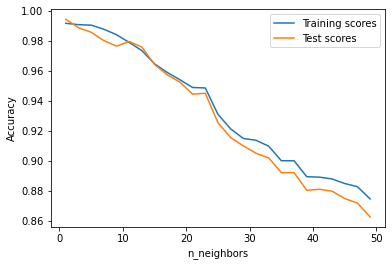

In [93]:
XRegular = RDW.drop('Disease', axis=1)
yRegular = RDW['Disease']

X_train, X_test, y_train, y_test = train_test_split(XRegular, yRegular, test_size=0.33, random_state=80)

training_scores = []
test_scores = []

neighbors = range(1, 50, 2)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.plot(neighbors, training_scores, label="Training scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


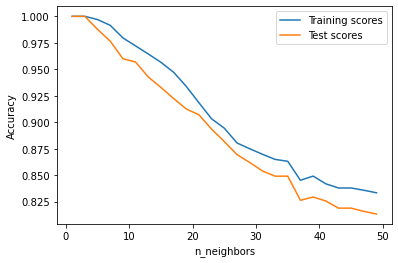

In [94]:
XUnqiue = RDU.drop('Disease', axis=1)
yUnqiue = RDU['Disease']

X_train, X_test, y_train, y_test = train_test_split(XUnqiue, yUnqiue, test_size=0.33, random_state=80)

training_scores = []
test_scores = []

neighbors = range(1, 50, 2)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.plot(neighbors, training_scores, label="Training scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


No real difference can be seen using the two different methods. Therefore the weighted data will simply be used from here on.

Herfra skal modellen tilpasses, så udnødvendige features fjernes

In [ ]:
Code

Hernæst skal modellen evalueres med eksempelvis noget confusion matrix

In [ ]:
Code

## Random Decision Trees

## Logistic regression